![This is an image](Quant-Trading.jpg)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates
formatter = mdates.DateFormatter("%Y-%m-%d")
import datetime

In [2]:
my_symbol_hist = pd.read_csv('USDCLP.csv')

In [3]:
MY_TICKER = my_symbol_hist.copy()
MY_TICKER['Date'] = pd.to_datetime(MY_TICKER['Date'])
MY_TICKER['Close'] = MY_TICKER['Close'].astype(float)

#CREATE PRICES UP TO 24 PERIODS FORWARD IN THE FUTURE
MY_TICKER['Close_1F'] = MY_TICKER['Close'].shift(periods=-1)
MY_TICKER['Close_2F'] = MY_TICKER['Close'].shift(periods=-2)
MY_TICKER['Close_3F'] = MY_TICKER['Close'].shift(periods=-3)
MY_TICKER['Close_4F'] = MY_TICKER['Close'].shift(periods=-4)
MY_TICKER['Close_5F'] = MY_TICKER['Close'].shift(periods=-5)
MY_TICKER['Close_6F'] = MY_TICKER['Close'].shift(periods=-6)
MY_TICKER['Close_7F'] = MY_TICKER['Close'].shift(periods=-7)
MY_TICKER['Close_8F'] = MY_TICKER['Close'].shift(periods=-8)
MY_TICKER['Close_9F'] = MY_TICKER['Close'].shift(periods=-9)
MY_TICKER['Close_10F'] = MY_TICKER['Close'].shift(periods=-10)
MY_TICKER['Close_11F'] = MY_TICKER['Close'].shift(periods=-11)
MY_TICKER['Close_12F'] = MY_TICKER['Close'].shift(periods=-12)
MY_TICKER['Close_13F'] = MY_TICKER['Close'].shift(periods=-13)
MY_TICKER['Close_14F'] = MY_TICKER['Close'].shift(periods=-14)
MY_TICKER['Close_15F'] = MY_TICKER['Close'].shift(periods=-15)
MY_TICKER['Close_16F'] = MY_TICKER['Close'].shift(periods=-16)
MY_TICKER['Close_17F'] = MY_TICKER['Close'].shift(periods=-17)
MY_TICKER['Close_18F'] = MY_TICKER['Close'].shift(periods=-18)
MY_TICKER['Close_19F'] = MY_TICKER['Close'].shift(periods=-19)
MY_TICKER['Close_20F'] = MY_TICKER['Close'].shift(periods=-20)
MY_TICKER['Close_21F'] = MY_TICKER['Close'].shift(periods=-21)
MY_TICKER['Close_22F'] = MY_TICKER['Close'].shift(periods=-22)
MY_TICKER['Close_23F'] = MY_TICKER['Close'].shift(periods=-23)
MY_TICKER['Close_24F'] = MY_TICKER['Close'].shift(periods=-24)

#FILTER FOR ONLY THE COLUMNS NEEDED
MY_TICKER = MY_TICKER[['Date','Close','Close_1F','Close_2F','Close_3F','Close_4F','Close_5F','Close_6F','Close_7F','Close_8F'
                      ,'Close_9F','Close_10F','Close_11F','Close_12F','Close_13F','Close_14F','Close_15F','Close_16F','Close_17F'
                      ,'Close_18F','Close_19F','Close_20F','Close_21F','Close_22F','Close_23F','Close_24F']][:-24]

MY_TICKER

,Date,Close,Close_1F,Close_2F,Close_3F,Close_4F,Close_5F,Close_6F,Close_7F,Close_8F,...,Close_15F,Close_16F,Close_17F,Close_18F,Close_19F,Close_20F,Close_21F,Close_22F,Close_23F,Close_24F
0,2003-12-01,603.530029,596.700012,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,...,597.260010,597.260010,597.260010,597.260010,597.260010,577.609985,582.200012,576.549988,575.570007,568.210022
1,2003-12-02,596.700012,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,...,597.260010,597.260010,597.260010,597.260010,577.609985,582.200012,576.549988,575.570007,568.210022,554.770019
2,2003-12-03,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,...,597.260010,597.260010,597.260010,577.609985,582.200012,576.549988,575.570007,568.210022,554.770019,548.010010
3,2003-12-04,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,577.690002,...,597.260010,597.260010,577.609985,582.200012,576.549988,575.570007,568.210022,554.770019,548.010010,550.400024
4,2003-12-05,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,577.690002,582.969971,...,597.260010,577.609985,582.200012,576.549988,575.570007,568.210022,554.770019,548.010010,550.400024,547.460022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4886,2022-10-11,937.679993,927.010010,944.010010,937.510010,961.510010,971.349976,972.750000,973.700012,978.000000,...,943.000000,942.940002,944.200012,944.159973,926.260010,916.349976,906.500000,906.500000,893.950012,890.460022
4887,2022-10-12,927.010010,944.010010,937.510010,961.510010,971.349976,972.750000,973.700012,978.000000,972.250000,...,942.940002,944.200012,944.159973,926.260010,916.349976,906.500000,906.500000,893.950012,890.460022,890.700012
4888,2022-10-13,944.010010,937.510010,961.510010,971.349976,972.750000,973.700012,978.000000,972.250000,986.250000,...,944.200012,944.159973,926.260010,916.349976,906.500000,906.500000,893.950012,890.460022,890.700012,886.500000
4889,2022-10-14,937.510010,961.510010,971.349976,972.750000,973.700012,978.000000,972.250000,986.250000,967.000000,...,944.159973,926.260010,916.349976,906.500000,906.500000,893.950012,890.460022,890.700012,886.500000,911.750000


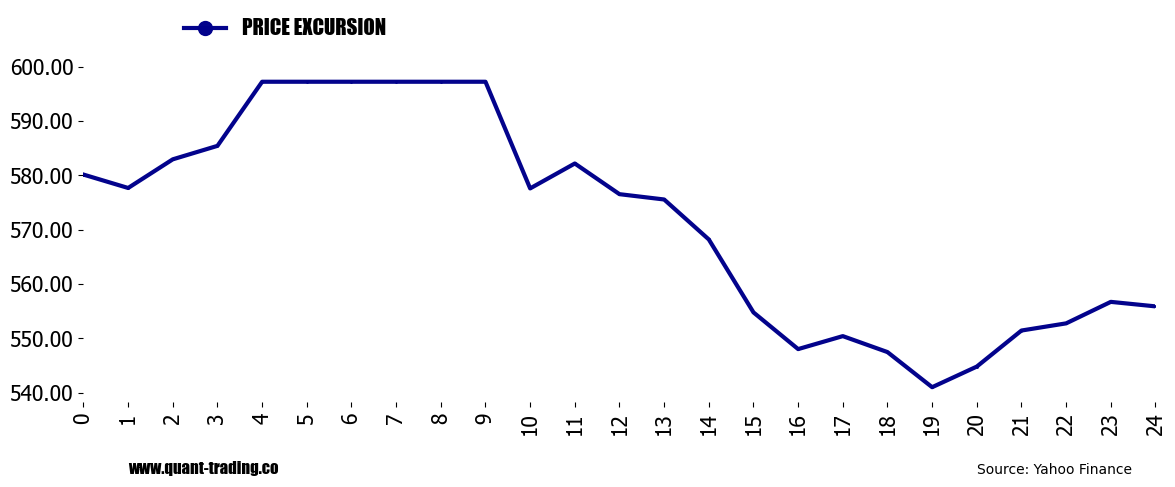

In [4]:
#------------------------24 PERIODS FORWARD CHART----------------------------------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 1

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(np.arange(0,25,1),MY_TICKER.iloc[10][1:27],marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='PRICE EXCURSION',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.3, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([0, 24, None, None])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax1.text(20, 525,'Source: Yahoo Finance' , color='black', fontsize=10)
ax1.text(1, 525,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=0.8)

plt.show()

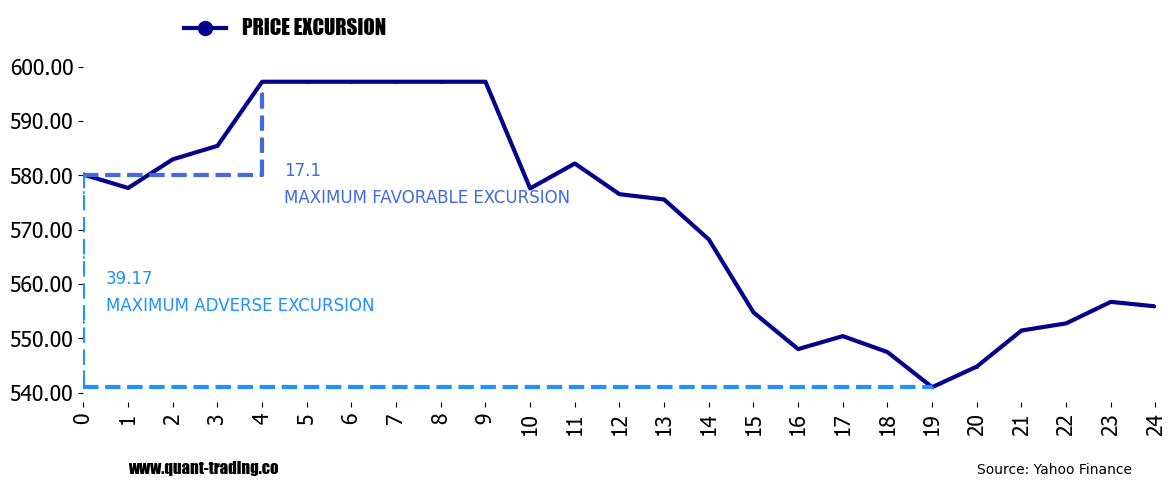

In [5]:
#------------------------24 PERIODS FORWARD CHART----------------------------------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 1

START_PRICE = MY_TICKER.iloc[10][1:27][0]
MAX_PRICE = np.max(MY_TICKER.iloc[10][1:27])
MIN_PRICE = np.min(MY_TICKER.iloc[10][1:27])
MFE = MAX_PRICE-START_PRICE
MAE = START_PRICE-MIN_PRICE

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(np.arange(0,25,1),MY_TICKER.iloc[10][1:27],marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='PRICE EXCURSION',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.3, 1.2),ncol=10,markerscale=10)
ax1.plot(np.arange(0,5,1),np.ones(5)*START_PRICE,marker='o', linestyle='dashed',linewidth=3,color='royalblue',alpha=0.99,markersize=1)
ax1.plot(np.ones(4)*4,np.arange(START_PRICE,START_PRICE+MFE,5),marker='o', linestyle='dashed',linewidth=3,color='royalblue',alpha=0.99,markersize=1)
ax1.plot(np.arange(0,20,1),np.ones(20)*MIN_PRICE,marker='o', linestyle='dashed',linewidth=3,color='dodgerblue',alpha=0.99,markersize=1)
ax1.plot(np.ones(14)*0,np.arange(START_PRICE-MAE,START_PRICE,3),marker='o', linestyle='dashed',linewidth=3,color='dodgerblue',alpha=0.99,markersize=1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([0, 24, None, None])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax1.text(4.5, 580,np.round(MFE,2), color='royalblue', fontsize=12)
ax1.text(4.5, 575,'MAXIMUM FAVORABLE EXCURSION', color='royalblue', fontsize=12)

ax1.text(0.5, 560,np.round(MAE,2), color='dodgerblue', fontsize=12)
ax1.text(0.5, 555,'MAXIMUM ADVERSE EXCURSION', color='dodgerblue', fontsize=12)

ax1.text(20, 525,'Source: Yahoo Finance' , color='black', fontsize=10)
ax1.text(1, 525,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=0.8)

plt.show()

In [6]:
MY_TICKER.iloc[10][1:27]

Close        580.159973
Close_1F     577.690002
Close_2F     582.969971
Close_3F     585.450012
Close_4F      597.26001
Close_5F      597.26001
Close_6F      597.26001
Close_7F      597.26001
Close_8F      597.26001
Close_9F      597.26001
Close_10F    577.609985
Close_11F    582.200012
Close_12F    576.549988
Close_13F    575.570007
Close_14F    568.210022
Close_15F    554.770019
Close_16F     548.01001
Close_17F    550.400024
Close_18F    547.460022
Close_19F     540.98999
Close_20F    544.789978
Close_21F    551.429993
Close_22F        552.75
Close_23F    556.710022
Close_24F    555.880005
Name: 10, dtype: object

In [7]:
print('MFE: '+ str(580.159973-540.98999))
print('MAE: '+ str(597.26001-580.159973))

MFE: 39.169983
MAE: 17.10003699999993


In [8]:
#CREATE 2 TEMPORARY VARIABLES TO CALCULATE MAXIMUM FAVORABLE AND MAXIMUM ADVERSE EXCURSION

MY_TICKER['TEMP1'] = MY_TICKER[['Close_1F','Close_2F','Close_3F','Close_4F','Close_5F','Close_6F','Close_7F','Close_8F'
                      ,'Close_9F','Close_10F','Close_11F','Close_12F','Close_13F','Close_14F','Close_15F','Close_16F','Close_17F'
                      ,'Close_18F','Close_19F','Close_20F','Close_21F','Close_22F','Close_23F','Close_24F']].max(axis=1)-MY_TICKER['Close']

MY_TICKER['TEMP2'] = MY_TICKER['Close']-MY_TICKER[['Close_1F','Close_2F','Close_3F','Close_4F','Close_5F','Close_6F','Close_7F','Close_8F'
                      ,'Close_9F','Close_10F','Close_11F','Close_12F','Close_13F','Close_14F','Close_15F','Close_16F','Close_17F'
                      ,'Close_18F','Close_19F','Close_20F','Close_21F','Close_22F','Close_23F','Close_24F']].min(axis=1)


In [9]:
MY_TICKER.head(11)

,Date,Close,Close_1F,Close_2F,Close_3F,Close_4F,Close_5F,Close_6F,Close_7F,Close_8F,...,Close_17F,Close_18F,Close_19F,Close_20F,Close_21F,Close_22F,Close_23F,Close_24F,TEMP1,TEMP2
0,2003-12-01,603.530029,596.700012,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,...,597.260010,597.260010,597.260010,577.609985,582.200012,576.549988,575.570007,568.210022,3.579956,35.320007
1,2003-12-02,596.700012,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,...,597.260010,597.260010,577.609985,582.200012,576.549988,575.570007,568.210022,554.770019,10.409973,41.929993
2,2003-12-03,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,...,597.260010,577.609985,582.200012,576.549988,575.570007,568.210022,554.770019,548.010010,12.779968,46.320007
3,2003-12-04,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,577.690002,...,577.609985,582.200012,576.549988,575.570007,568.210022,554.770019,548.010010,550.400024,23.390015,35.709961
4,2003-12-05,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,577.690002,582.969971,...,582.200012,576.549988,575.570007,568.210022,554.770019,548.010010,550.400024,547.460022,18.929993,40.719971
5,2003-12-08,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,577.690002,582.969971,585.450012,...,576.549988,575.570007,568.210022,554.770019,548.010010,550.400024,547.460022,540.989990,0.000000,66.119995
6,2003-12-09,607.109985,607.109985,607.109985,581.739990,580.159973,577.690002,582.969971,585.450012,597.260010,...,575.570007,568.210022,554.770019,548.010010,550.400024,547.460022,540.989990,544.789978,0.000000,66.119995
7,2003-12-10,607.109985,607.109985,581.739990,580.159973,577.690002,582.969971,585.450012,597.260010,597.260010,...,568.210022,554.770019,548.010010,550.400024,547.460022,540.989990,544.789978,551.429993,0.000000,66.119995
8,2003-12-11,607.109985,581.739990,580.159973,577.690002,582.969971,585.450012,597.260010,597.260010,597.260010,...,554.770019,548.010010,550.400024,547.460022,540.989990,544.789978,551.429993,552.750000,-9.849976,66.119995
9,2003-12-12,581.739990,580.159973,577.690002,582.969971,585.450012,597.260010,597.260010,597.260010,597.260010,...,548.010010,550.400024,547.460022,540.989990,544.789978,551.429993,552.750000,556.710022,15.520020,40.750000


In [10]:
##CALCULATE MAXIMUM FAVORABLE AND ADVERSE EXCURSION AND ALSO UP AND DOWN EDGE
MY_TICKER['UMAX'] = MY_TICKER.apply(lambda x: np.maximum(x['TEMP1'],0), axis=1)
MY_TICKER['UMIN'] = MY_TICKER.apply(lambda x: np.maximum(x['TEMP2'],0), axis=1)
MY_TICKER['DMAX'] = MY_TICKER['UMIN'] 
MY_TICKER['DMIN'] = MY_TICKER['UMAX'] 

MY_TICKER['U-EDGE'] =(MY_TICKER['UMAX']-MY_TICKER['UMIN'])/(MY_TICKER['UMAX']+MY_TICKER['UMIN'])
MY_TICKER['D-EDGE'] =(MY_TICKER['DMAX']-MY_TICKER['DMIN'])/(MY_TICKER['DMAX']+MY_TICKER['DMIN'])
MY_TICKER.reset_index(inplace=True)

MY_TICKER.head(11)

,index,Date,Close,Close_1F,Close_2F,Close_3F,Close_4F,Close_5F,Close_6F,Close_7F,...,Close_23F,Close_24F,TEMP1,TEMP2,UMAX,UMIN,DMAX,DMIN,U-EDGE,D-EDGE
0,0,2003-12-01,603.530029,596.700012,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,...,575.570007,568.210022,3.579956,35.320007,3.579956,35.320007,35.320007,3.579956,-0.815940,0.815940
1,1,2003-12-02,596.700012,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,...,568.210022,554.770019,10.409973,41.929993,10.409973,41.929993,41.929993,10.409973,-0.602217,0.602217
2,2,2003-12-03,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,...,554.770019,548.010010,12.779968,46.320007,12.779968,46.320007,46.320007,12.779968,-0.567514,0.567514
3,3,2003-12-04,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,...,548.010010,550.400024,23.390015,35.709961,23.390015,35.709961,35.709961,23.390015,-0.208459,0.208459
4,4,2003-12-05,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,577.690002,...,550.400024,547.460022,18.929993,40.719971,18.929993,40.719971,40.719971,18.929993,-0.365297,0.365297
5,5,2003-12-08,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,577.690002,582.969971,...,547.460022,540.989990,0.000000,66.119995,0.000000,66.119995,66.119995,0.000000,-1.000000,1.000000
6,6,2003-12-09,607.109985,607.109985,607.109985,581.739990,580.159973,577.690002,582.969971,585.450012,...,540.989990,544.789978,0.000000,66.119995,0.000000,66.119995,66.119995,0.000000,-1.000000,1.000000
7,7,2003-12-10,607.109985,607.109985,581.739990,580.159973,577.690002,582.969971,585.450012,597.260010,...,544.789978,551.429993,0.000000,66.119995,0.000000,66.119995,66.119995,0.000000,-1.000000,1.000000
8,8,2003-12-11,607.109985,581.739990,580.159973,577.690002,582.969971,585.450012,597.260010,597.260010,...,551.429993,552.750000,-9.849976,66.119995,0.000000,66.119995,66.119995,0.000000,-1.000000,1.000000
9,9,2003-12-12,581.739990,580.159973,577.690002,582.969971,585.450012,597.260010,597.260010,597.260010,...,552.750000,556.710022,15.520020,40.750000,15.520020,40.750000,40.750000,15.520020,-0.448373,0.448373


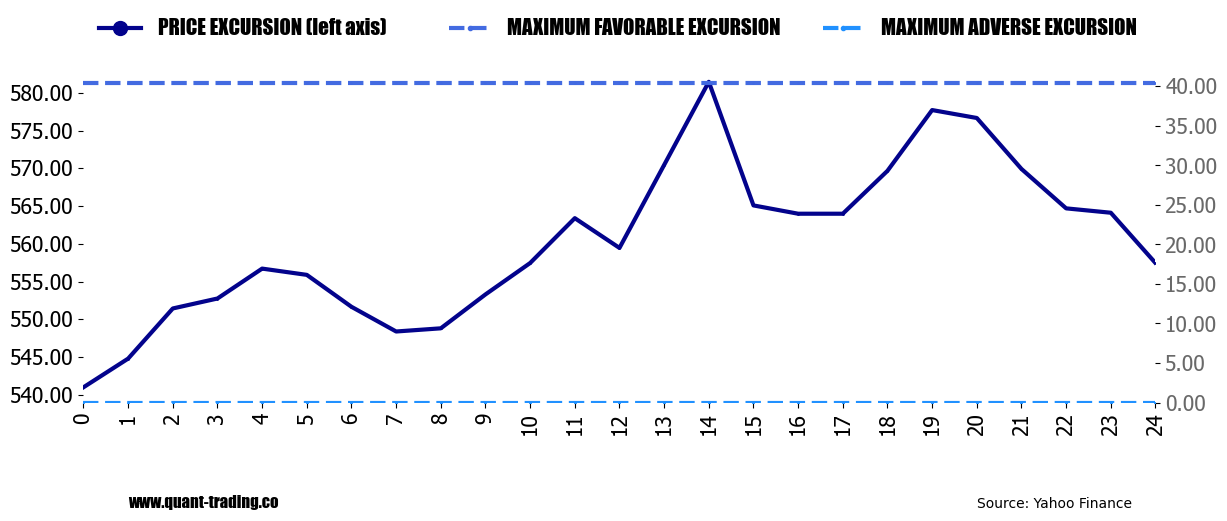

In [11]:
#------------------------24 PERIODS FORWARD CHART----------------------------------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 1

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(np.arange(0,25,1),MY_TICKER.iloc[29][2:27],marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='PRICE EXCURSION (left axis)',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.3, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([0, 24, None, None])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)


ax2 = ax1.twinx()
ax2.plot(np.arange(0,25,1),np.ones(25)*(np.max(MY_TICKER.iloc[29][2:27])-MY_TICKER.iloc[29][2:27][0]),marker='o', linestyle='dashed',linewidth=3,color='royalblue',alpha=0.99,label='MAXIMUM FAVORABLE EXCURSION',markersize=1)
ax2.plot(np.arange(0,25,1),np.ones(25)*(MY_TICKER.iloc[29][2:27][0]-np.min(MY_TICKER.iloc[29][2:27])),marker='o', linestyle='dashed',linewidth=3,color='dodgerblue',alpha=0.99,label='MAXIMUM ADVERSE EXCURSION',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.0, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15, color='dimgrey')
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis([0, 24, 0, None])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)


ax1.text(20, 525,'Source: Yahoo Finance' , color='black', fontsize=10)
ax1.text(1, 525,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=0.8)

plt.show()


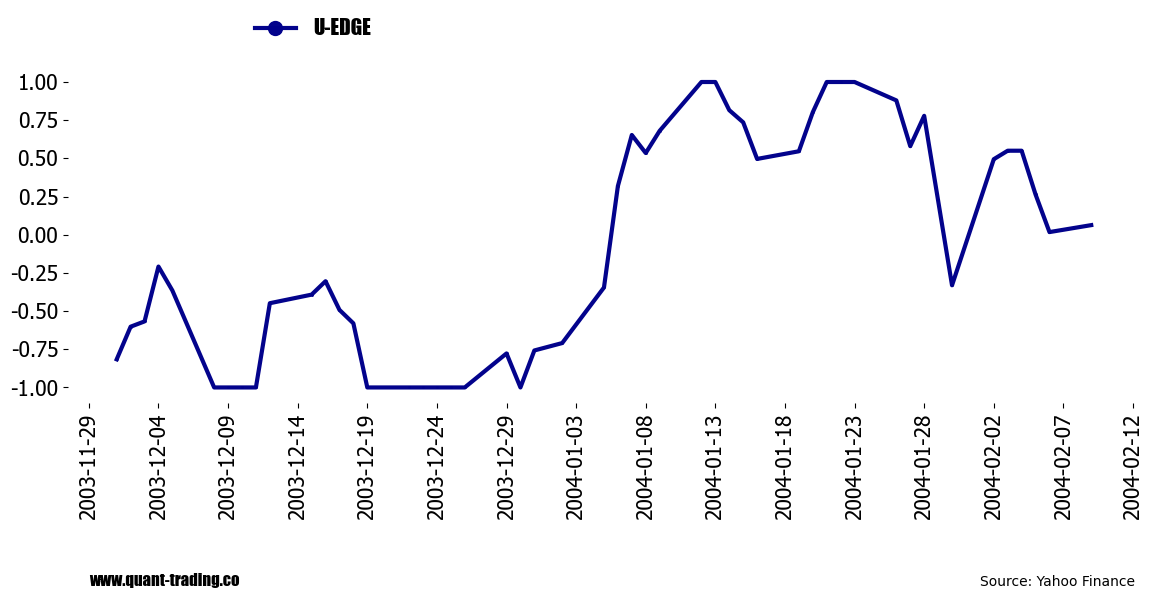

In [12]:
#------------------------24 PERIODS FORWARD CHART----------------------------------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 5

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(MY_TICKER['Date'].head(50),MY_TICKER['U-EDGE'].head(50),marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='U-EDGE',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.3, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([None, None, None, None])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax1.text(datetime.datetime(2004, 2, 1), -2.3,'Source: Yahoo Finance' , color='black', fontsize=10)
ax1.text(datetime.datetime(2003, 11, 29), -2.3,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=0.8)

plt.show()

In [13]:
my_factor1_hist = pd.read_csv('HG1.csv')
my_factor2_hist = pd.read_csv('LATAM_corp_spread.csv')

my_factor1_hist.reset_index(inplace=True)
my_factor1_hist['Date'] = pd.to_datetime(my_factor1_hist['Date'])
my_factor1_hist = my_factor1_hist.rename(columns={'Close':'Factor1'})

my_factor2_hist['Date'] = pd.to_datetime(my_factor2_hist['DATE'])
my_factor2_hist['Inv_spread'] = 1/my_factor2_hist['BAMLEMRLCRPILAOAS']
my_factor2_hist = my_factor2_hist.rename(columns={'Inv_spread':'Factor2'})


print(my_factor1_hist.head(10))
print(my_factor2_hist.head(10))

   index       Date    Open    High     Low  Factor1  Volume  Dividends  \
0      0 2000-08-30  0.8790  0.8870  0.8770   0.8850    2886          0   
1      1 2000-08-31  0.8850  0.8880  0.8800   0.8850    1095          0   
2      2 2000-09-01  0.8780  0.8890  0.8780   0.8890    3449          0   
3      3 2000-09-05  0.8960  0.9070  0.8950   0.9060    1397          0   
4      4 2000-09-06  0.9050  0.9060  0.8975   0.9015    1195          0   
5      5 2000-09-07  0.9015  0.9070  0.9015   0.9060    1598          0   
6      6 2000-09-08  0.9120  0.9190  0.9095   0.9120     628          0   
7      7 2000-09-11  0.9110  0.9130  0.9070   0.9130     653          0   
8      8 2000-09-12  0.9120  0.9285  0.9120   0.9285     623          0   
9      9 2000-09-13  0.9335  0.9335  0.9270   0.9275    1014          0   

   Stock Splits  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  
6             0  
7             0  
8           

In [14]:
#DATABASE WITH FACTORS

df_TOTAL = pd.merge(MY_TICKER,my_factor1_hist[['Date','Factor1']], left_on='Date',right_on='Date', how='left')
df_TOTAL = pd.merge(df_TOTAL,my_factor2_hist[['Date','Factor2']], left_on='Date',right_on='Date', how='left')
df_TOTAL.dropna(inplace=True)


df_IS = df_TOTAL[df_TOTAL['Date']<datetime.datetime(2018,12,31)]

df_IS.tail(30)

,index,Date,Close,Close_1F,Close_2F,Close_3F,Close_4F,Close_5F,Close_6F,Close_7F,...,TEMP1,TEMP2,UMAX,UMIN,DMAX,DMIN,U-EDGE,D-EDGE,Factor1,Factor2
3868,3868,2018-11-14,691.000000,682.000000,673.200012,670.000000,669.099976,671.200012,666.000000,667.900024,...,-3.200012,25.000000,0.000000,25.000000,25.000000,0.000000,-1.000000,1.000000,2.7095,0.287356
3869,3869,2018-11-15,682.000000,673.200012,670.000000,669.099976,671.200012,666.000000,667.900024,674.200012,...,7.500000,16.000000,7.500000,16.000000,16.000000,7.500000,-0.361702,0.361702,2.7490,0.281690
3870,3870,2018-11-16,673.200012,670.000000,669.099976,671.200012,666.000000,667.900024,674.200012,676.299988,...,17.200012,7.200012,17.200012,7.200012,7.200012,17.200012,0.409836,-0.409836,2.8040,0.277008
3871,3871,2018-11-19,670.000000,669.099976,671.200012,666.000000,667.900024,674.200012,676.299988,674.900024,...,20.799988,4.000000,20.799988,4.000000,4.000000,20.799988,0.677419,-0.677419,2.8045,0.272480
3872,3872,2018-11-20,669.099976,671.200012,666.000000,667.900024,674.200012,676.299988,674.900024,674.400024,...,23.900024,3.099976,23.900024,3.099976,3.099976,23.900024,0.770372,-0.770372,2.7665,0.265957
3873,3873,2018-11-21,671.200012,666.000000,667.900024,674.200012,676.299988,674.900024,674.400024,670.000000,...,21.799988,5.200012,21.799988,5.200012,5.200012,21.799988,0.614814,-0.614814,2.7945,0.266667
3875,3875,2018-11-23,667.900024,674.200012,676.299988,674.900024,674.400024,670.000000,671.099976,668.700012,...,25.199951,-0.799988,25.199951,0.000000,0.000000,25.199951,1.000000,-1.000000,2.7705,0.265957
3876,3876,2018-11-26,674.200012,676.299988,674.900024,674.400024,670.000000,671.099976,668.700012,670.200012,...,22.500000,5.500000,22.500000,5.500000,5.500000,22.500000,0.607143,-0.607143,2.7585,0.265252
3877,3877,2018-11-27,676.299988,674.900024,674.400024,670.000000,671.099976,668.700012,670.200012,672.200012,...,20.400024,7.599976,20.400024,7.599976,7.599976,20.400024,0.457145,-0.457145,2.7105,0.259740
3878,3878,2018-11-28,674.900024,674.400024,670.000000,671.099976,668.700012,670.200012,672.200012,675.299988,...,21.799988,6.200012,21.799988,6.200012,6.200012,21.799988,0.557142,-0.557142,2.7960,0.261780


In [15]:
#CREATE FUNCTION TO ASSIGN 1 OR -1 FOR TOP AND BOTTOM PERCENTILE
def sample_quantile(x,Factor):
    if x > df_IS[Factor].quantile(0.90):
        result = 1
    elif x < df_IS[Factor].quantile(0.10):
        result = -1
    else:
        result = 0
    return result

In [16]:
#PERCENTILE FOR EACH FACTOR

df_IS['Percentil_Factor1'] = df_IS['Factor1'].apply(lambda x: sample_quantile(x,'Factor1'))
df_IS['Percentil_Factor2'] = df_IS['Factor2'].apply(lambda x: sample_quantile(x,'Factor2'))
df_IS

,index,Date,Close,Close_1F,Close_2F,Close_3F,Close_4F,Close_5F,Close_6F,Close_7F,...,UMAX,UMIN,DMAX,DMIN,U-EDGE,D-EDGE,Factor1,Factor2,Percentil_Factor1,Percentil_Factor2
0,0,2003-12-01,603.530029,596.700012,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,...,3.579956,35.320007,35.320007,3.579956,-0.815940,0.815940,0.9555,0.314465,-1,0
1,1,2003-12-02,596.700012,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,...,10.409973,41.929993,41.929993,10.409973,-0.602217,0.602217,0.9695,0.312500,-1,0
2,2,2003-12-03,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,...,12.779968,46.320007,46.320007,12.779968,-0.567514,0.567514,0.9760,0.313480,-1,0
3,3,2003-12-04,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,...,23.390015,35.709961,35.709961,23.390015,-0.208459,0.208459,0.9630,0.312500,-1,0
4,4,2003-12-05,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,577.690002,...,18.929993,40.719971,40.719971,18.929993,-0.365297,0.365297,0.9690,0.303951,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3895,2018-12-21,690.799988,693.000000,689.599976,689.599976,693.099976,696.700012,693.500000,693.000000,...,5.900024,22.299988,22.299988,5.900024,-0.581559,0.581559,2.6785,0.255102,0,0
3896,3896,2018-12-24,693.000000,689.599976,689.599976,693.099976,696.700012,693.500000,693.000000,693.500000,...,3.700012,24.500000,24.500000,3.700012,-0.737588,0.737588,2.6685,0.251889,0,0
3898,3898,2018-12-26,689.599976,693.099976,696.700012,693.500000,693.000000,693.500000,696.299988,693.299988,...,7.100037,21.099976,21.099976,7.100037,-0.496452,0.496452,2.7085,0.253807,0,0
3899,3899,2018-12-27,693.099976,696.700012,693.500000,693.000000,693.500000,696.299988,693.299988,680.700012,...,3.600037,26.299988,26.299988,3.600037,-0.759195,0.759195,2.6675,0.250627,0,0


In [17]:
#LONG AND SHORT EDGE FOR EACH FACTOR

LONG_EDGE_F1 = df_IS[df_IS['Percentil_Factor1']==1]['U-EDGE'].mean()
SHORT_EDGE_F1 = df_IS[df_IS['Percentil_Factor1']==-1]['D-EDGE'].mean()
TOTAL_EDGE_F1 = (LONG_EDGE_F1+SHORT_EDGE_F1)/2

LONG_EDGE_F2 = df_IS[df_IS['Percentil_Factor2']==1]['U-EDGE'].mean()
SHORT_EDGE_F2 = df_IS[df_IS['Percentil_Factor2']==-1]['D-EDGE'].mean()
TOTAL_EDGE_F2 = (LONG_EDGE_F2+SHORT_EDGE_F2)/2

print('Long Edge Factor1 '+ str(LONG_EDGE_F1))
print('Short Edge Factor1 '+str(SHORT_EDGE_F1))
print('Total Edge Factor1 '+str(TOTAL_EDGE_F1))

print('Long Edge Factor2 '+ str(LONG_EDGE_F2))
print('Short Edge Factor2 '+str(SHORT_EDGE_F2))
print('Total Edge Factor2 '+str(TOTAL_EDGE_F2))

Long Edge Factor1 0.05652197868332041
Short Edge Factor1 0.1470164263866294
Total Edge Factor1 0.1017692025349749
Long Edge Factor2 0.06400488903434073
Short Edge Factor2 0.1684962570712729
Total Edge Factor2 0.11625057305280681


In [18]:
#Z-SCORE FOR EACH FACTOR

df_IS['Z-Factor1'] = (df_IS['Factor1']-df_IS['Factor1'].mean())/df_IS['Factor1'].std()
df_IS['Z-Factor2'] = (df_IS['Factor2']-df_IS['Factor2'].mean())/df_IS['Factor2'].std()
df_IS

,index,Date,Close,Close_1F,Close_2F,Close_3F,Close_4F,Close_5F,Close_6F,Close_7F,...,DMAX,DMIN,U-EDGE,D-EDGE,Factor1,Factor2,Percentil_Factor1,Percentil_Factor2,Z-Factor1,Z-Factor2
0,0,2003-12-01,603.530029,596.700012,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,...,35.320007,3.579956,-0.815940,0.815940,0.9555,0.314465,-1,0,-2.334317,0.230974
1,1,2003-12-02,596.700012,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,...,41.929993,10.409973,-0.602217,0.602217,0.9695,0.312500,-1,0,-2.316957,0.213997
2,2,2003-12-03,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,...,46.320007,12.779968,-0.567514,0.567514,0.9760,0.313480,-1,0,-2.308896,0.222459
3,3,2003-12-04,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,...,35.709961,23.390015,-0.208459,0.208459,0.9630,0.312500,-1,0,-2.325017,0.213997
4,4,2003-12-05,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,577.690002,...,40.719971,18.929993,-0.365297,0.365297,0.9690,0.303951,-1,0,-2.317577,0.140151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3895,2018-12-21,690.799988,693.000000,689.599976,689.599976,693.099976,696.700012,693.500000,693.000000,...,22.299988,5.900024,-0.581559,0.581559,2.6785,0.255102,0,0,-0.197752,-0.281822
3896,3896,2018-12-24,693.000000,689.599976,689.599976,693.099976,696.700012,693.500000,693.000000,693.500000,...,24.500000,3.700012,-0.737588,0.737588,2.6685,0.251889,0,0,-0.210153,-0.309576
3898,3898,2018-12-26,689.599976,693.099976,696.700012,693.500000,693.000000,693.500000,696.299988,693.299988,...,21.099976,7.100037,-0.496452,0.496452,2.7085,0.253807,0,0,-0.160552,-0.293008
3899,3899,2018-12-27,693.099976,696.700012,693.500000,693.000000,693.500000,696.299988,693.299988,680.700012,...,26.299988,3.600037,-0.759195,0.759195,2.6675,0.250627,0,0,-0.211393,-0.320483


In [19]:
#WEIGHING SCHEME
WEIGHTS = [0.5,0.5]

df_IS['SIGNAL'] = WEIGHTS[0]*df_IS['Z-Factor1']+WEIGHTS[1]*df_IS['Z-Factor2']
df_IS

,index,Date,Close,Close_1F,Close_2F,Close_3F,Close_4F,Close_5F,Close_6F,Close_7F,...,DMIN,U-EDGE,D-EDGE,Factor1,Factor2,Percentil_Factor1,Percentil_Factor2,Z-Factor1,Z-Factor2,SIGNAL
0,0,2003-12-01,603.530029,596.700012,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,...,3.579956,-0.815940,0.815940,0.9555,0.314465,-1,0,-2.334317,0.230974,-1.051671
1,1,2003-12-02,596.700012,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,...,10.409973,-0.602217,0.602217,0.9695,0.312500,-1,0,-2.316957,0.213997,-1.051480
2,2,2003-12-03,594.330017,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,...,12.779968,-0.567514,0.567514,0.9760,0.313480,-1,0,-2.308896,0.222459,-1.043219
3,3,2003-12-04,583.719971,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,...,23.390015,-0.208459,0.208459,0.9630,0.312500,-1,0,-2.325017,0.213997,-1.055510
4,4,2003-12-05,588.179993,607.109985,607.109985,607.109985,607.109985,581.739990,580.159973,577.690002,...,18.929993,-0.365297,0.365297,0.9690,0.303951,-1,0,-2.317577,0.140151,-1.088713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3895,2018-12-21,690.799988,693.000000,689.599976,689.599976,693.099976,696.700012,693.500000,693.000000,...,5.900024,-0.581559,0.581559,2.6785,0.255102,0,0,-0.197752,-0.281822,-0.239787
3896,3896,2018-12-24,693.000000,689.599976,689.599976,693.099976,696.700012,693.500000,693.000000,693.500000,...,3.700012,-0.737588,0.737588,2.6685,0.251889,0,0,-0.210153,-0.309576,-0.259864
3898,3898,2018-12-26,689.599976,693.099976,696.700012,693.500000,693.000000,693.500000,696.299988,693.299988,...,7.100037,-0.496452,0.496452,2.7085,0.253807,0,0,-0.160552,-0.293008,-0.226780
3899,3899,2018-12-27,693.099976,696.700012,693.500000,693.000000,693.500000,696.299988,693.299988,680.700012,...,3.600037,-0.759195,0.759195,2.6675,0.250627,0,0,-0.211393,-0.320483,-0.265938


In [20]:
df_IS['Percentil_SIGNAL'] = df_IS['SIGNAL'].apply(lambda x: sample_quantile(x,'SIGNAL'))

In [21]:
LONG_EDGE_SIGNAL = df_IS[df_IS['Percentil_SIGNAL']==1]['U-EDGE'].mean()
SHORT_EDGE_SIGNAL = df_IS[df_IS['Percentil_SIGNAL']==-1]['D-EDGE'].mean()
TOTAL_EDGE_SIGNAL = (LONG_EDGE_SIGNAL+SHORT_EDGE_SIGNAL)/2

print('Long Edge Signal '+ str(LONG_EDGE_SIGNAL))
print('Short Edge Signal '+str(SHORT_EDGE_SIGNAL))
print('Total Edge Signal '+str(TOTAL_EDGE_SIGNAL))

Long Edge Signal 0.1014874002867095
Short Edge Signal 0.2924922953233633
Total Edge Signal 0.1969898478050364


Percentile 90: 0.9077320824056946
Percentile 10: -0.9622430249010098


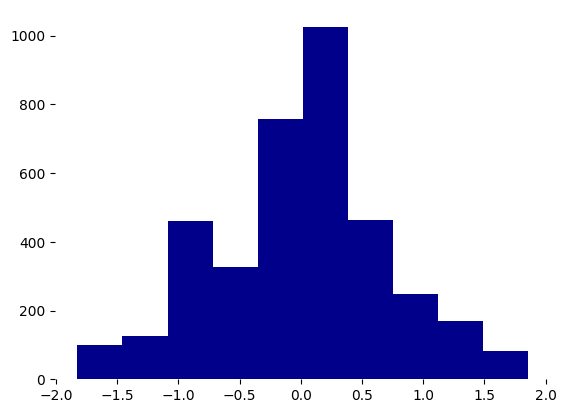

In [22]:
plt.hist(df_IS['SIGNAL'],color='darkblue')
plt.box(on=None)
print('Percentile 90: '+str(df_IS['SIGNAL'].quantile(0.90)))
print('Percentile 10: '+str(df_IS['SIGNAL'].quantile(0.10)))

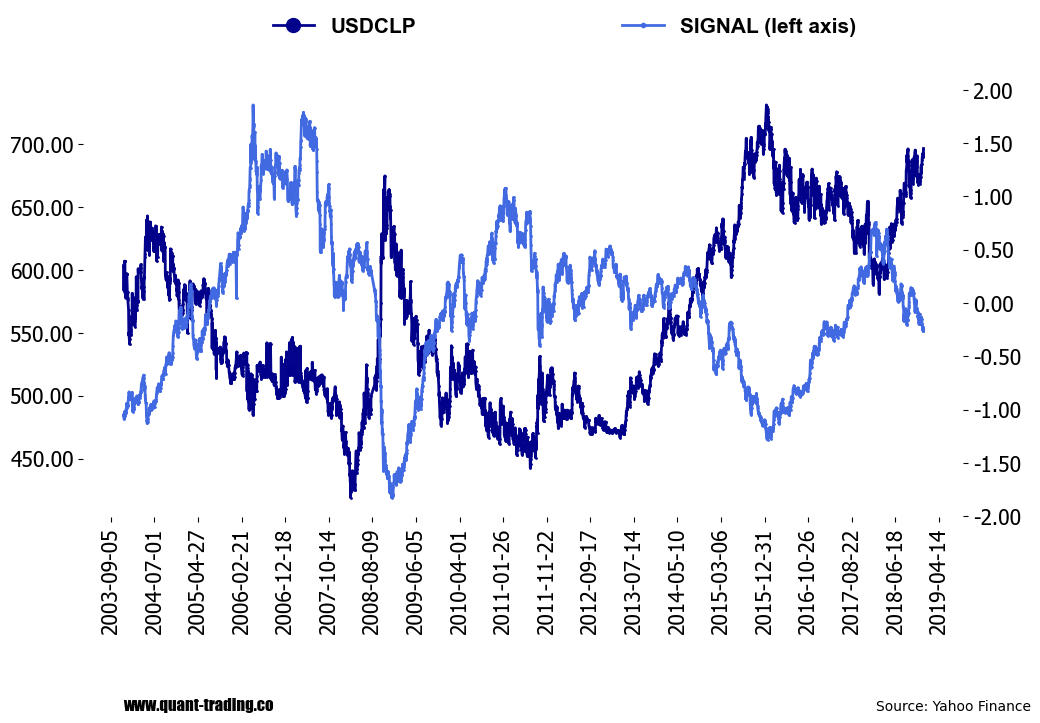

In [23]:
#------------------------GRÁFICO ACTIVO VS FACTOR-----------------------------------#
font = font_manager.FontProperties(family='Arial',weight='bold', style='normal', size=15)
tick_spacing1 = 300


fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df_IS['Date'],df_IS['Close'],marker='o', linestyle='solid',linewidth=2,color='darkblue',alpha=0.99,label='USDCLP',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([None, None, None, None])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(df_IS['Date'],df_IS['SIGNAL'],marker='o',linestyle='solid',linewidth=2,color='royalblue',alpha=0.99,label='SIGNAL (left axis)',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.9, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis([None, None, None, None])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax1.text(datetime.datetime(2018, 2, 1), 250,'Source: Yahoo Finance' , color='black', fontsize=10)
ax1.text(datetime.datetime(2003, 11, 29), 250,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(wspace = 0.3,hspace = 0.8,bottom=0.1, right=1.5, top=1.0)

plt.show()

In [25]:
#BACKTESTING IS

#PARAMETERS
ENTRY_LEVEL_UP = 0.90
ENTRY_LEVEL_DOWN = -0.90
EXIT_LEVEL_UP = 0.6
EXIT_LEVEL_DOWN = -0.6
STOP_LONG = 0.05
STOP_SHORT = -0.05
PROFIT_LONG = 0.05
PROFIT_SHORT = -0.05

df_IS['POSITION'] = ""
df_IS['TRADE'] = ""
df_IS['POSITION'].iloc[0]  = 'FLAT' 
POSITION = 'FLAT'
TRADE = 'NTG'
ENTRY_PRICE = ""


def calculate_position(PRED,CLOSE):  

        global POSITION
        global TRADE 
        global ENTRY_PRICE

        if POSITION == 'FLAT':        
            if PRED > ENTRY_LEVEL_UP:
                TRADE = 'BUY'
                POSITION = 'LONG'
                ENTRY_PRICE = CLOSE
            elif PRED < ENTRY_LEVEL_DOWN:
                TRADE = 'SELL'
                POSITION = 'SHORT'
                ENTRY_PRICE = CLOSE
            else: 
                TRADE = 'NTG'
                POSITION = 'FLAT'

        elif POSITION == 'SHORT':
            if PRED > EXIT_LEVEL_DOWN or CLOSE/ENTRY_PRICE -1 > STOP_LONG or CLOSE/ENTRY_PRICE -1 < PROFIT_SHORT:
                TRADE = 'BUY'
                POSITION = 'FLAT'                
            else: 
                TRADE = 'NTG'
                POSITION = 'SHORT'

        elif POSITION == 'LONG':    
            if PRED < EXIT_LEVEL_UP or CLOSE/ENTRY_PRICE -1 < STOP_SHORT or CLOSE/ENTRY_PRICE -1 < PROFIT_LONG:
                TRADE = 'SELL'
                POSITION = 'FLAT'                
            else: 
                TRADE = 'NTG'
                POSITION = 'LONG'       

        return POSITION, TRADE
    
results = df_IS.apply(lambda row: calculate_position(PRED=row['SIGNAL'],CLOSE=row['Close']),axis=1)
df_IS['POSITION'] = [x[0] for x in results]
df_IS['TRADE'] = [x[1] for x in results]


#TRADES AND RETURN CALCULATION
df_trades = df_IS[df_IS['POSITION'].isin(['LONG', 'SHORT']) | df_IS['TRADE'].isin(['BUY', 'SELL'])]

# Calcular el retorno
df_trades['RETURN'] = df_trades['Close'][:-1].values / df_trades['Close'][1:] - 1

# Definir condiciones y elecciones para RETURN_SIGN
conditions = [
    (df_trades['POSITION'] == 'SHORT'),
    (df_trades['POSITION'] == 'LONG'),
    (df_trades['POSITION'] == 'FLAT') & (df_trades['TRADE'] == 'BUY'),
    (df_trades['POSITION'] == 'FLAT') & (df_trades['TRADE'] == 'SELL')
]
choices = [1.0, -1.0, 1.0, -1.0]

# Aplicar np.select con default como 0.0
df_trades['RETURN_SIGN'] = np.select(conditions, choices, default=0.0)
df_trades['RETURN_SIGN'] = df_trades['RETURN_SIGN'].astype(float)

# Ajustar los retornos en condiciones específicas
df_trades.loc[(df_trades['POSITION'] == 'SHORT') & (df_trades['TRADE'] == 'SELL') |
              (df_trades['POSITION'] == 'LONG') & (df_trades['TRADE'] == 'BUY'), 'RETURN'] = 0

# Calcular RETURN2, CUM_RETURN, WEALTH_INDEX y MAX_DRAWDOWN
df_trades['RETURN2'] = df_trades['RETURN'] * df_trades['RETURN_SIGN']
df_trades['CUM_RETURN'] = (1 + df_trades['RETURN2']).cumprod() - 1
df_trades['WEALTH_INDEX'] = 100 * (1 + df_trades['CUM_RETURN'])
df_trades['PREV_PEAK'] = df_trades['WEALTH_INDEX'].cummax()
df_trades['MAX_DRAWDOWN'] = (df_trades['WEALTH_INDEX'] - df_trades['PREV_PEAK']) / df_trades['PREV_PEAK']


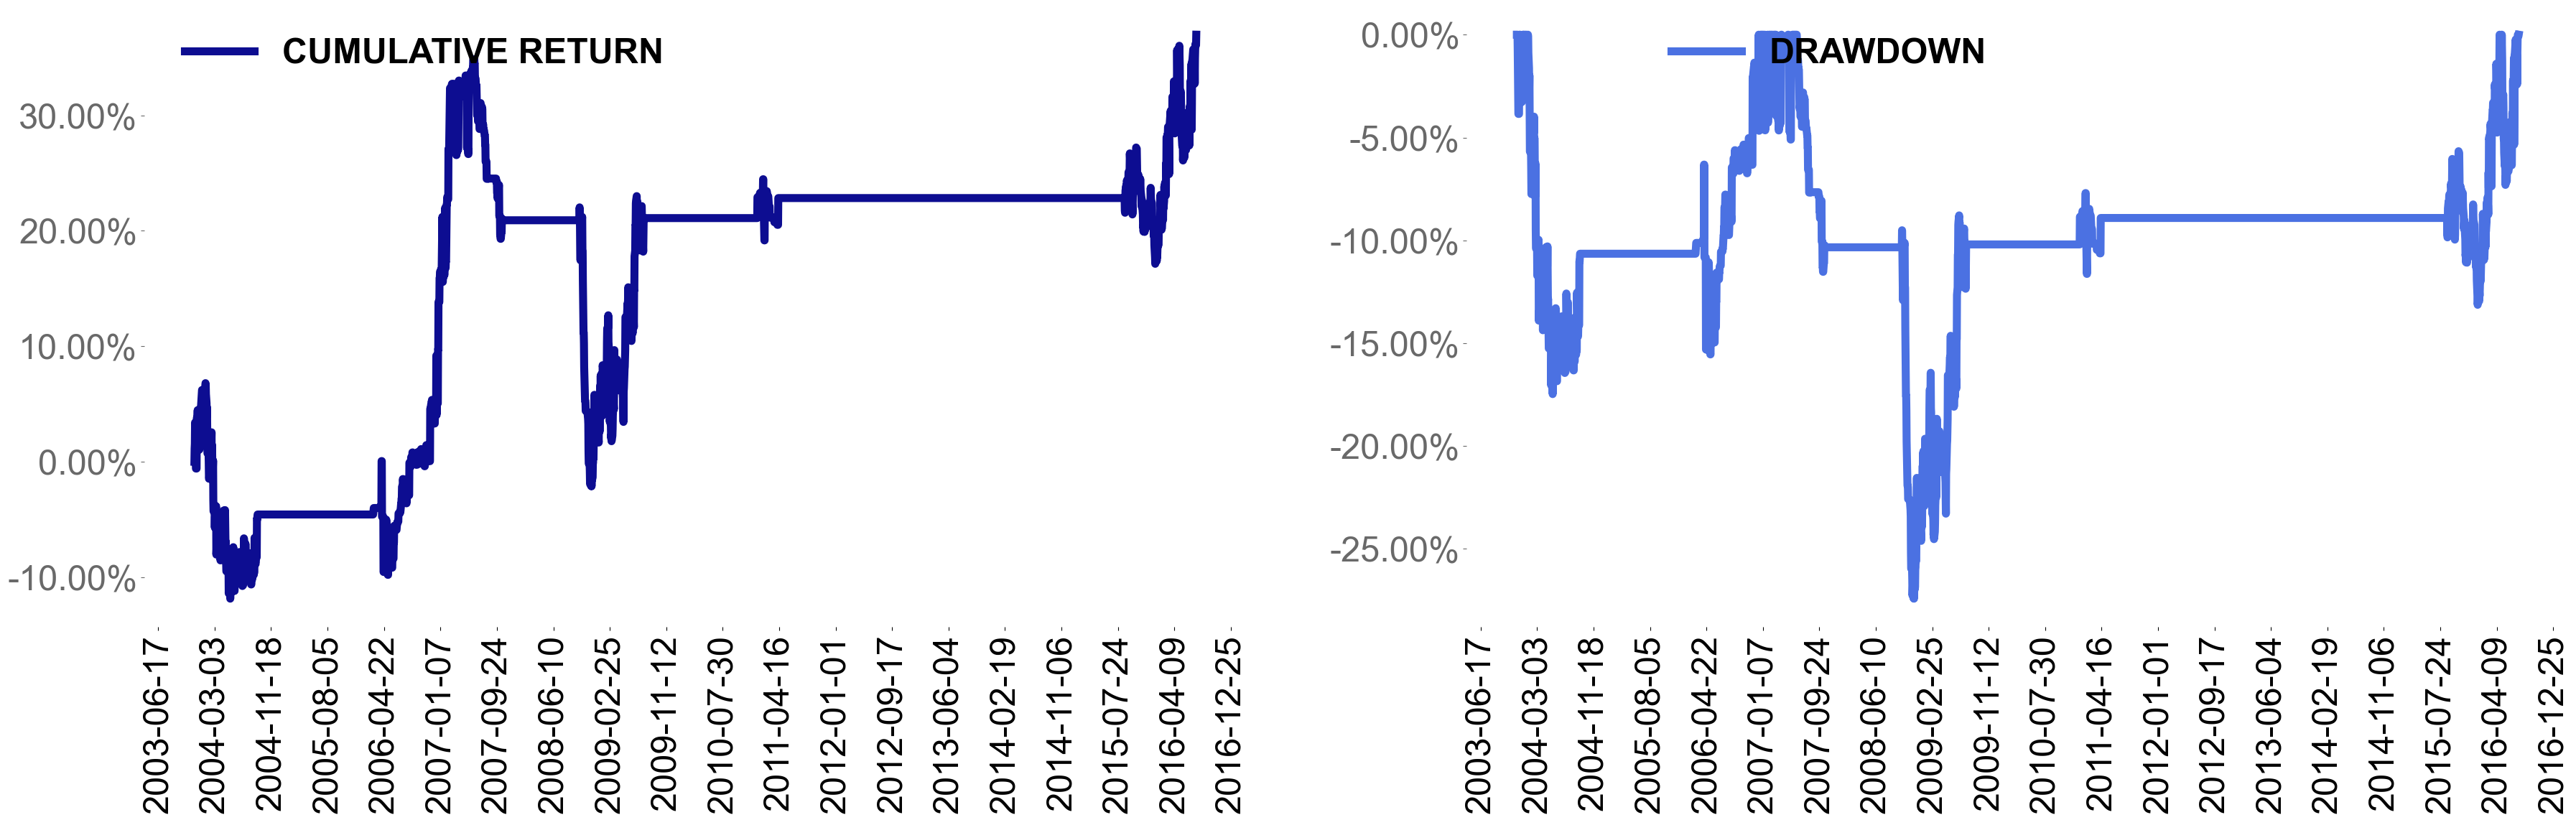

In [26]:
#RETURN AND DRAWDOWN CHART
tick_spacing1 = 260
FONTSIZE = 35
font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=FONTSIZE)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(df_trades['Date'],df_trades['CUM_RETURN'],marker='None', linestyle='solid',linewidth=8,color='darkblue',alpha = 0.95,label='CUMULATIVE RETURN',markersize=5)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.0),ncol=2,markerscale=3)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=FONTSIZE)
plt.xticks(fontname = "Arial",fontsize=FONTSIZE)
ax1.axis([None, None, None, None])
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:0,.2%}'.format(x) for x in vals])
ax1.tick_params(axis='y', color = 'dimgrey', labelcolor='dimgrey')
plt.box(on=None)

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(df_trades['Date'],df_trades['MAX_DRAWDOWN'],marker='None', linestyle='solid',linewidth=8,color='royalblue',alpha = 0.95,label='DRAWDOWN',markersize=5)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.0),ncol=2,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=FONTSIZE)
plt.xticks(fontname = "Arial",fontsize=FONTSIZE)
ax2.axis([None, None, None, None])
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:0,.2%}'.format(x) for x in vals])
ax2.tick_params(axis='y', color = 'dimgrey', labelcolor='dimgrey')
plt.box(on=None)

plt.subplots_adjust(wspace = 0.2,bottom=0.1, right=5.4, top=1.9)

plt.show()

In [27]:
#OUT OF SAMPLE
df_OS = df_TOTAL[df_TOTAL['Date']>datetime.datetime(2018,12,31)]

df_OS['Z-Factor1'] = (df_OS['Factor1']-df_IS['Factor1'].mean())/df_IS['Factor1'].std()
df_OS['Z-Factor2'] = (df_OS['Factor2']-df_IS['Factor2'].mean())/df_IS['Factor2'].std()


WEIGHTS = [0.5,0.5]

df_OS['SIGNAL'] = WEIGHTS[0]*df_OS['Z-Factor1']+WEIGHTS[1]*df_OS['Z-Factor2']

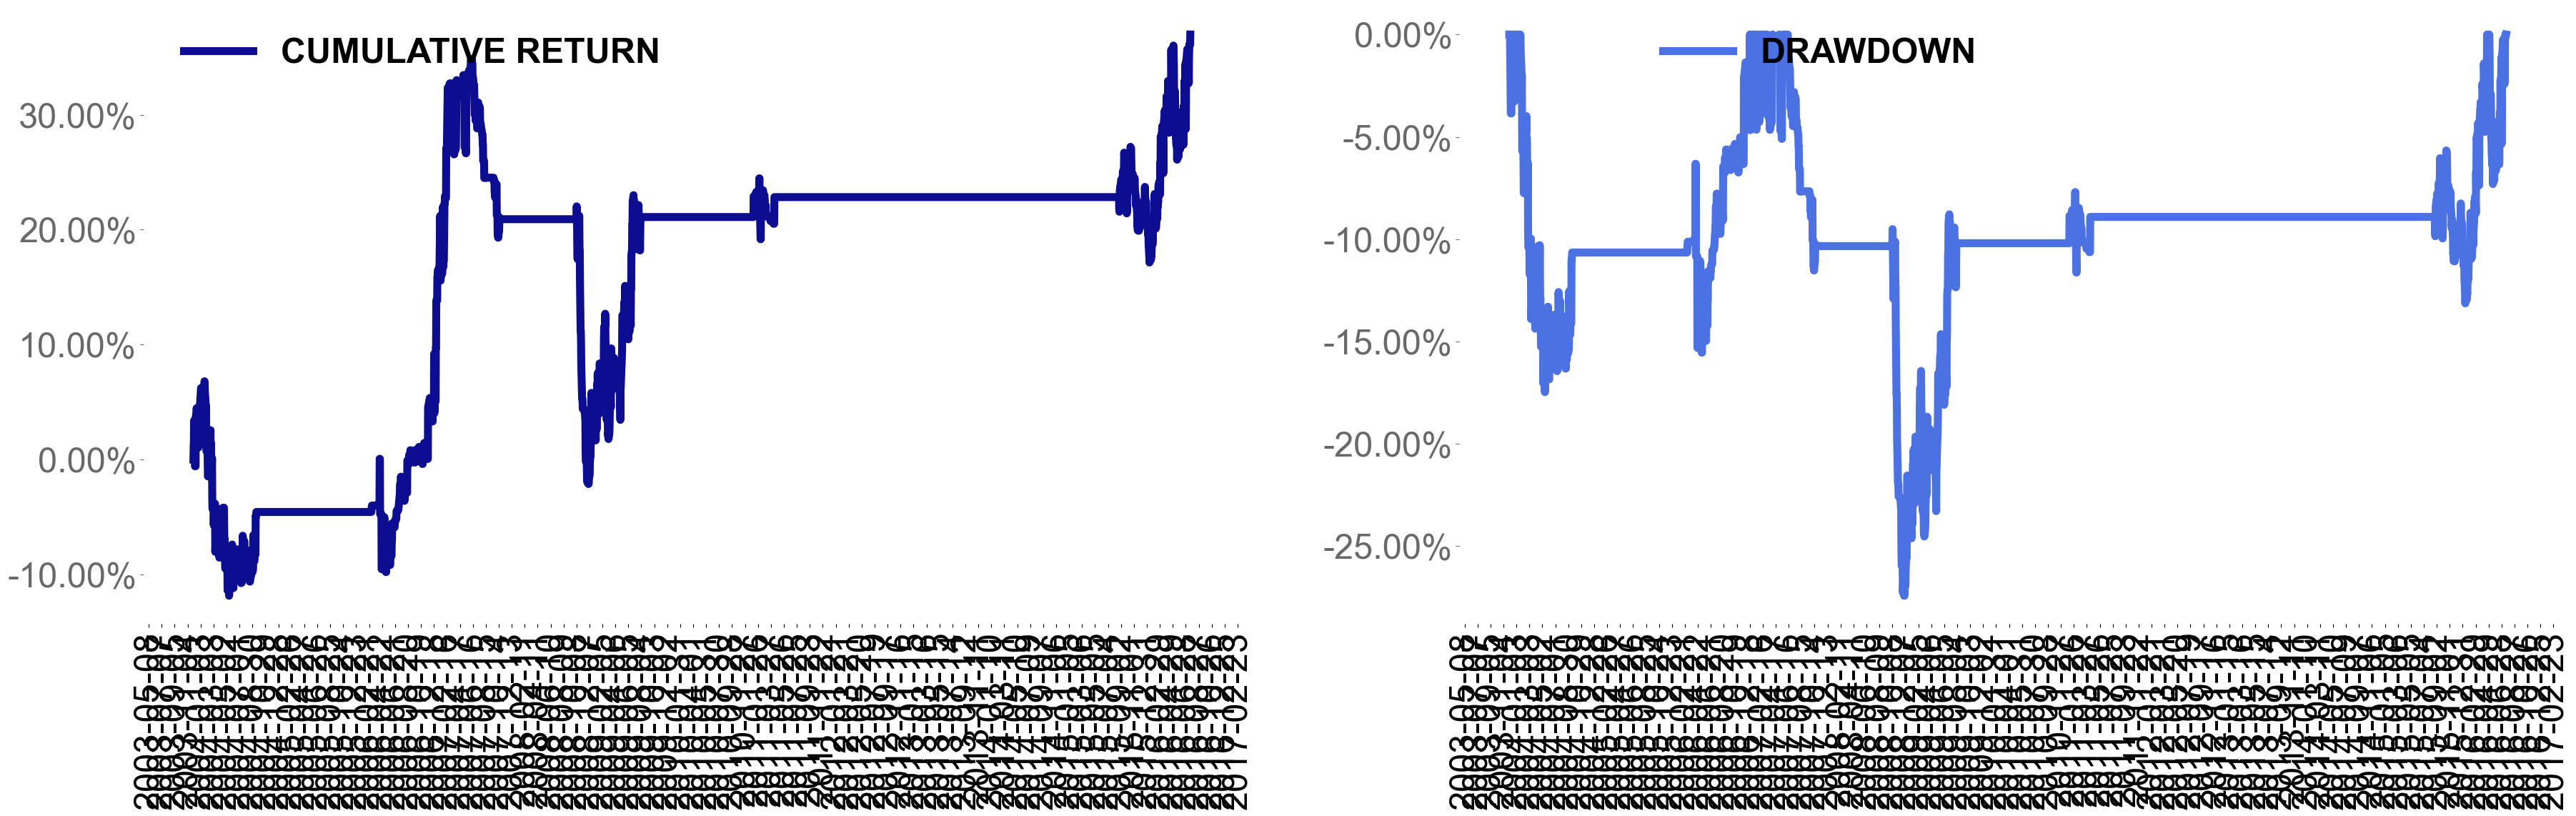

In [29]:
#BACKTESTING OS

#PARAMETERS
ENTRY_LEVEL_UP = 0.90
ENTRY_LEVEL_DOWN = -0.90
EXIT_LEVEL_UP = 0.6
EXIT_LEVEL_DOWN = -0.6
STOP_LONG = 0.05
STOP_SHORT = -0.05
PROFIT_LONG = 0.05
PROFIT_SHORT = -0.05

df_OS['POSITION'] = ""
df_OS['TRADE'] = ""
df_OS['POSITION'].iloc[0]  = 'FLAT' 
POSITION = 'FLAT'
TRADE = 'NTG'
ENTRY_PRICE = ""


def calculate_position(PRED,CLOSE):  

        global POSITION
        global TRADE 
        global ENTRY_PRICE

        if POSITION == 'FLAT':        
            if PRED > ENTRY_LEVEL_UP:
                TRADE = 'BUY'
                POSITION = 'LONG'
                ENTRY_PRICE = CLOSE
            elif PRED < ENTRY_LEVEL_DOWN:
                TRADE = 'SELL'
                POSITION = 'SHORT'
                ENTRY_PRICE = CLOSE
            else: 
                TRADE = 'NTG'
                POSITION = 'FLAT'

        elif POSITION == 'SHORT':
            if PRED > EXIT_LEVEL_DOWN or CLOSE/ENTRY_PRICE -1 > STOP_LONG or CLOSE/ENTRY_PRICE -1 < PROFIT_SHORT:
                TRADE = 'BUY'
                POSITION = 'FLAT'                
            else: 
                TRADE = 'NTG'
                POSITION = 'SHORT'

        elif POSITION == 'LONG':    
            if PRED < EXIT_LEVEL_UP or CLOSE/ENTRY_PRICE -1 < STOP_SHORT or CLOSE/ENTRY_PRICE -1 < PROFIT_LONG:
                TRADE = 'SELL'
                POSITION = 'FLAT'                
            else: 
                TRADE = 'NTG'
                POSITION = 'LONG'       

        return POSITION, TRADE
    
results = df_OS.apply(lambda row: calculate_position(PRED=row['SIGNAL'],CLOSE=row['Close']),axis=1)
df_OS['POSITION'] = [x[0] for x in results]
df_OS['TRADE'] = [x[1] for x in results]


#TRADES AND RETURN CALCULATION
df_trades = df_IS[df_IS['POSITION'].isin(['LONG', 'SHORT']) | df_IS['TRADE'].isin(['BUY', 'SELL'])]

# Calcular el retorno
df_trades['RETURN'] = df_trades['Close'][:-1].values / df_trades['Close'][1:] - 1

# Definir condiciones y elecciones para RETURN_SIGN
conditions = [
    (df_trades['POSITION'] == 'SHORT'),
    (df_trades['POSITION'] == 'LONG'),
    (df_trades['POSITION'] == 'FLAT') & (df_trades['TRADE'] == 'BUY'),
    (df_trades['POSITION'] == 'FLAT') & (df_trades['TRADE'] == 'SELL')
]
choices = [1.0, -1.0, 1.0, -1.0]

# Aplicar np.select con default como 0.0
df_trades['RETURN_SIGN'] = np.select(conditions, choices, default=0.0)
df_trades['RETURN_SIGN'] = df_trades['RETURN_SIGN'].astype(float)

# Ajustar los retornos en condiciones específicas
df_trades.loc[(df_trades['POSITION'] == 'SHORT') & (df_trades['TRADE'] == 'SELL') |
              (df_trades['POSITION'] == 'LONG') & (df_trades['TRADE'] == 'BUY'), 'RETURN'] = 0

# Calcular RETURN2, CUM_RETURN, WEALTH_INDEX y MAX_DRAWDOWN
df_trades['RETURN2'] = df_trades['RETURN'] * df_trades['RETURN_SIGN']
df_trades['CUM_RETURN'] = (1 + df_trades['RETURN2']).cumprod() - 1
df_trades['WEALTH_INDEX'] = 100 * (1 + df_trades['CUM_RETURN'])
df_trades['PREV_PEAK'] = df_trades['WEALTH_INDEX'].cummax()
df_trades['MAX_DRAWDOWN'] = (df_trades['WEALTH_INDEX'] - df_trades['PREV_PEAK']) / df_trades['PREV_PEAK']

# Reiniciar el índice
# df_trades.reset_index(inplace=True)

#RETURN AND DRAWDOWN CHART
tick_spacing1 = 60
FONTSIZE = 35
font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=FONTSIZE)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(df_trades['Date'],df_trades['CUM_RETURN'],marker='None', linestyle='solid',linewidth=8,color='darkblue',alpha = 0.95,label='CUMULATIVE RETURN',markersize=5)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.0),ncol=2,markerscale=3)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=FONTSIZE)
plt.xticks(fontname = "Arial",fontsize=FONTSIZE)
ax1.axis([None, None, None, None])
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:0,.2%}'.format(x) for x in vals])
ax1.tick_params(axis='y', color = 'dimgrey', labelcolor='dimgrey')
plt.box(on=None)

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(df_trades['Date'],df_trades['MAX_DRAWDOWN'],marker='None', linestyle='solid',linewidth=8,color='royalblue',alpha = 0.95,label='DRAWDOWN',markersize=5)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.0),ncol=2,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=FONTSIZE)
plt.xticks(fontname = "Arial",fontsize=FONTSIZE)
ax2.axis([None, None, None, None])
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:0,.2%}'.format(x) for x in vals])
ax2.tick_params(axis='y', color = 'dimgrey', labelcolor='dimgrey')
plt.box(on=None)

plt.subplots_adjust(wspace = 0.2,bottom=0.1, right=5.4, top=1.9)

plt.show()
